In [16]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from black_scholes_model import calculate_BS_OPM
import seaborn as sns
import matplotlib.pyplot as plt

### Formula
Call Option: 
$$V_C = P_0 N(d_1) - \frac{X}{e^{k_{RF}t}} N(d_2)$$
Put Option:
$$V_p = V_c + \frac{X}{e^{k_{RF}t}} - P_0$$

The intermediate variables:
$$d_1 = \frac{ln(\frac{P_0}{X}) + (k_{RF} + .5\sigma^2)t}{\sigma \sqrt{t}}$$
$$d_2 = \sigma \sqrt{t}$$

In [20]:
P_0 = 100      # Current stock price
X = 95       # Strike price
T = 0.5      # Time to expiration in years (6 months)
r = 0.05     # Risk-free rate (5%)
sigma = 0.20 # Volatility (20%)

put_price = calculate_BS_OPM(P_0, X, T, sigma, r, False)
print(f"The price of the put option is: {put_price:.2f}")

The price of the put option is: 2.53


In [21]:
call_price = calculate_BS_OPM(P_0, X, T, sigma, r, True)
print(f"The price of the call option is: {call_price:.2f}")

The price of the call option is: 9.87


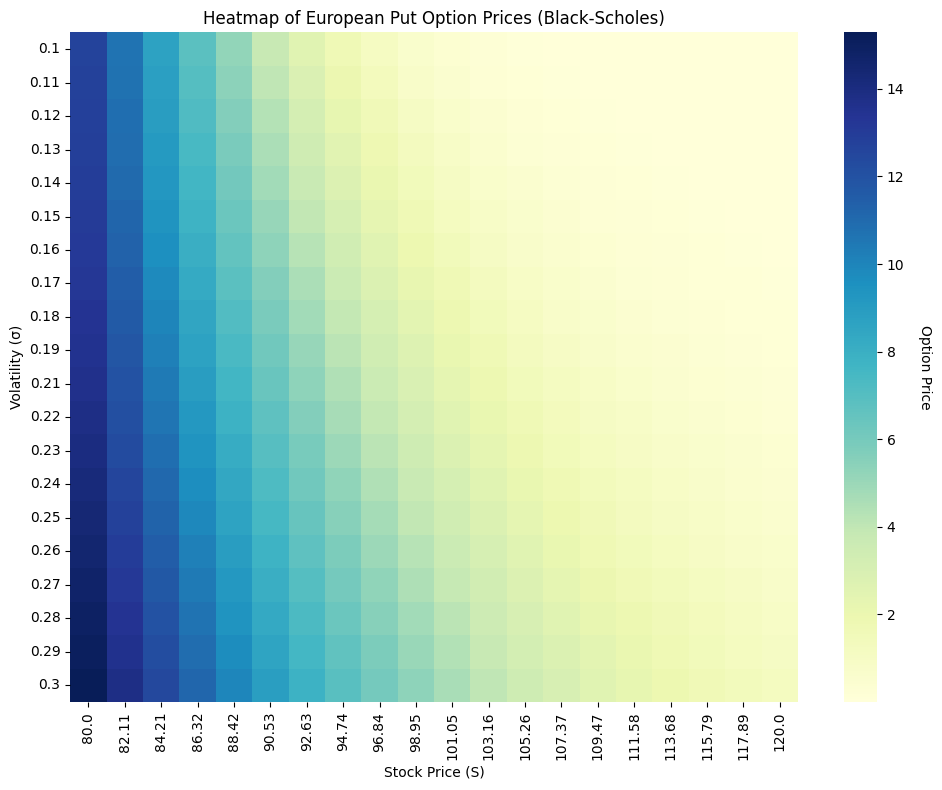

In [28]:
# Create a range of stock prices and volatilities
S_range = np.linspace(P_0 * (1 - .2), P_0 * (1 + .2) , 20)  # Stock prices from 50 to 150
sigma_range = np.linspace(sigma - .1, sigma + .1, 20)  # Volatility from 10% to 50%

# Create a meshgrid for stock prices and volatilities
S_grid, sigma_grid = np.meshgrid(S_range, sigma_range)

# Calculate the put option prices for each combination of stock price and volatility
put_prices = np.zeros_like(S_grid)
for i in range(len(S_range)):
    for j in range(len(sigma_range)):
        put_prices[j, i] = calculate_BS_OPM(S_grid[j, i], X, T, sigma_grid[j, i],r, False)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(put_prices, xticklabels=np.round(S_range, 2), yticklabels=np.round(sigma_range, 2), cmap="YlGnBu")

# Adding label to the color bar
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Option Price', rotation=270, labelpad=20)

# Labeling the axes
plt.xlabel('Stock Price (S)')
plt.ylabel('Volatility (σ)')
plt.title('Heatmap of European Put Option Prices (Black-Scholes)')

# Show the heatmap
plt.tight_layout()
plt.show()

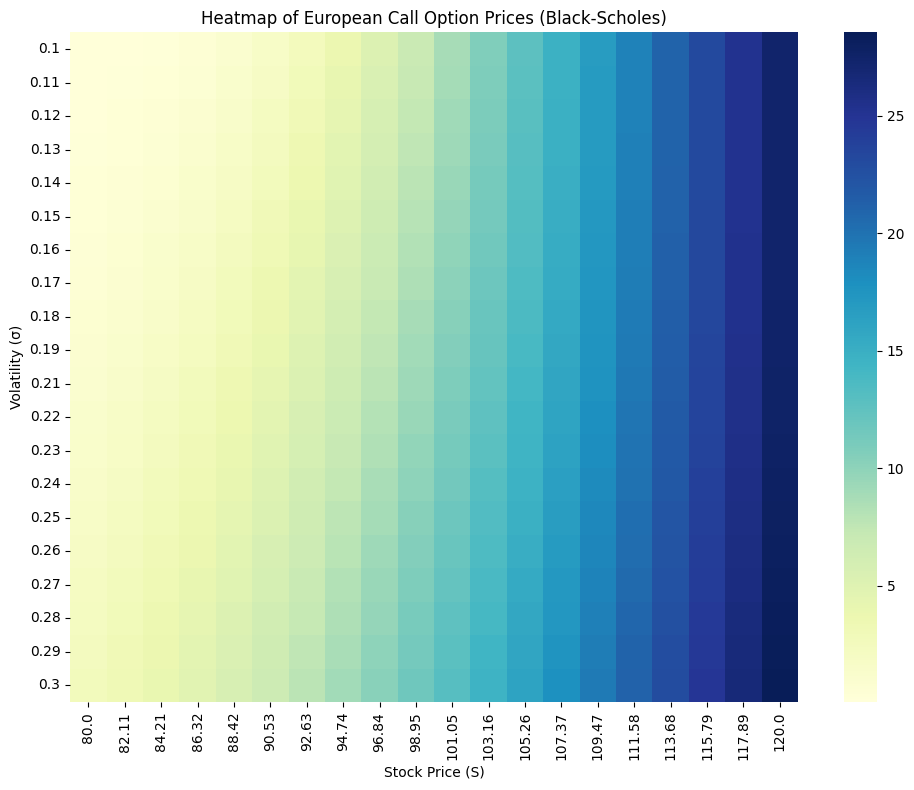

In [29]:
# Calculate the call option prices for each combination of stock price and volatility
put_prices = np.zeros_like(S_grid)
for i in range(len(S_range)):
    for j in range(len(sigma_range)):
        put_prices[j, i] = calculate_BS_OPM(S_grid[j, i], X, T, sigma_grid[j, i],r, True)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(put_prices, xticklabels=np.round(S_range, 2), yticklabels=np.round(sigma_range, 2), cmap="YlGnBu")

# Labeling the axes
plt.xlabel('Stock Price (S)')
plt.ylabel('Volatility (σ)')
plt.title('Heatmap of European Call Option Prices (Black-Scholes)')

# Show the heatmap
plt.tight_layout()
plt.show()